###  Libraries needed

In [1]:
# libraries needed
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


### Data loading

In [2]:
#dataset
df = pd.read_csv('tm_premier_league_debuts (Final).csv')

# The dataset shapetm_premier_league_debuts (Final)
print('Data shape: ',df.shape,'\n')

df.head(5)

Data shape:  (680, 27) 



,name,Position,club status,Foreign,age at debut,birth quarter,Height,International,Weights,Market value on debut,...,potential,weak_foot,skill_moves,pace/diving,shooting/handling,passing/kicking,dribbling/reflexes,defending/Speed,physical/positioning,success
0,Harvey Elliott,Winger,0,0,16.01,3,162,11,65,1.800,...,87,4,3,75,53,58,69,30,37,0
1,Izzy Brown,Winger,1,0,16.03,2,180,18,69,0.225,...,80,3,3,74,65,65,75,43,64,0
2,Rushian Hepburn-Murphy,STR,0,0,16.06,4,173,4,68,0.225,...,76,3,3,80,62,47,65,26,45,0
3,Reece Oxford06,CDM,0,0,16.07,2,193,21,21,0.675,...,86,3,2,71,33,50,53,65,67,0
4,Jack Robinson,FB,1,0,16.08,1,180,6,70,0.045,...,74,3,2,69,37,57,56,62,60,0


In [3]:
#The dataset columns
df.columns

Index(['name', 'Position', 'club status', 'Foreign', 'age at debut',
       'birth quarter', 'Height', 'International', 'Weights',
       'Market value on debut', 'pro debut?', 'nation status', 'assists',
       'goals', 'awards', 'FDB rank', 'Overall', 'potential', 'weak_foot',
       'skill_moves', 'pace/diving', 'shooting/handling', 'passing/kicking',
       'dribbling/reflexes', 'defending/Speed', 'physical/positioning',
       'success'],
      dtype='object')

## Data Preparation

In [4]:
# Data cleaning

if not df.isnull().values.any():
    print('There is no missing value.')
else:
    print('There are some missing value.')
    
# Displaying outlier data    
display(df[(df['Weights'] < 50) | (df['Height'] < 150)])

# Dropping outlier data
df = df[(df['Weights'] > 50) & (df['Height'] > 150)]

There is no missing value.


,name,Position,club status,Foreign,age at debut,birth quarter,Height,International,Weights,Market value on debut,...,potential,weak_foot,skill_moves,pace/diving,shooting/handling,passing/kicking,dribbling/reflexes,defending/Speed,physical/positioning,success
3,Reece Oxford06,CDM,0,0,16.07,2,193,21,21,0.675,...,86,3,2,71,33,50,53,65,67,0
28,Michael Obafemi,STR,0,1,17.06,4,58,4,71,0.450,...,77,3,2,71,60,48,60,23,46,0
251,Aaron Connolly,STR,0,1,19.07,2,162,17,1,1.100,...,79,3,2,60,20,70,64,40,57,0


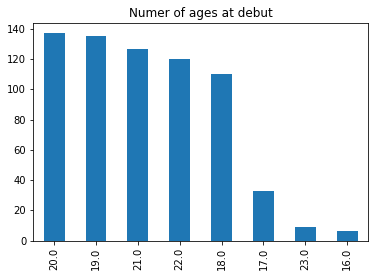

In [5]:
# Number of different ages
status_vals1 = df['age at debut'].round().value_counts()
(status_vals1).plot(kind='bar');
plt.title('Numer of ages at debut');


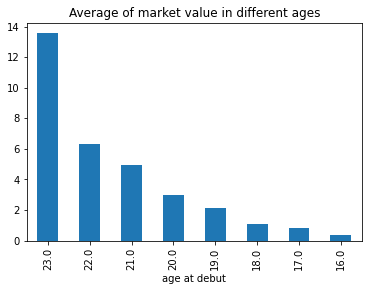

In [6]:
# Average of market value in different ages
status_vals2 = df.round().groupby(['age at debut']).mean()['Market value on debut'].sort_values(ascending=False)
(status_vals2.iloc[:10]).plot(kind='bar');
plt.title('Average of market value in different ages');

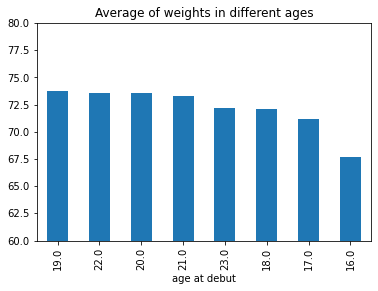

In [7]:
# Average of weights in different ages
status_vals3 = df.round().groupby(['age at debut']).mean()['Weights'].sort_values(ascending=False)
(status_vals3.iloc[:10]).plot(kind='bar', ylim = (60, 80));
plt.title('Average of weights in different ages');

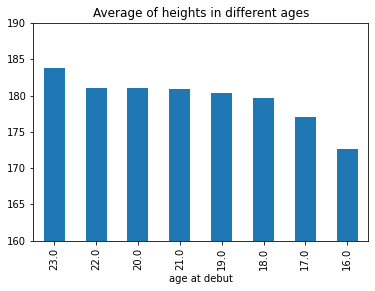

In [8]:
# Average of heights in different ages
status_vals4 = df.round().groupby(['age at debut']).mean()['Height'].sort_values(ascending=False)
(status_vals4.iloc[:10]).plot(kind='bar', ylim = (160, 190));
plt.title('Average of heights in different ages');

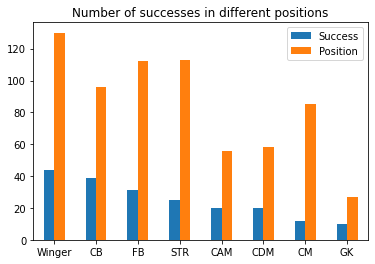

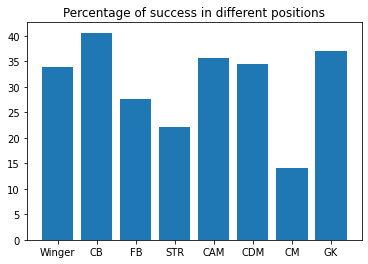

In [9]:
# Number of successes in different positions

position = df['Position'].value_counts()
success = df.round().groupby(['Position']).sum()['success'].sort_values(ascending=False)
status_vals5 = pd.DataFrame({'Success': success,
                   'Position': position}, index=list(success.index))
status_vals5.plot.bar(rot=0)
plt.title('Number of successes in different positions');

plt.figure()
ratio = 100*success/position
ratio = ratio.reindex(success.index)
plt.bar(list(ratio.index),ratio )
plt.title('Percentage of success in different positions');



## What factors have the most impact on sucess?

### Covariance 
Covariance refers to the relationship between two variables. The covariance between two variables indicates the direction of their relationship. Generally, covariance values range from -inf to +inf, where a positive value indicates a trend in both variables, while a negative value indicates a trend in the opposite direction. Data exploration for feature selection and multivariate analysis relies heavily on covariance.

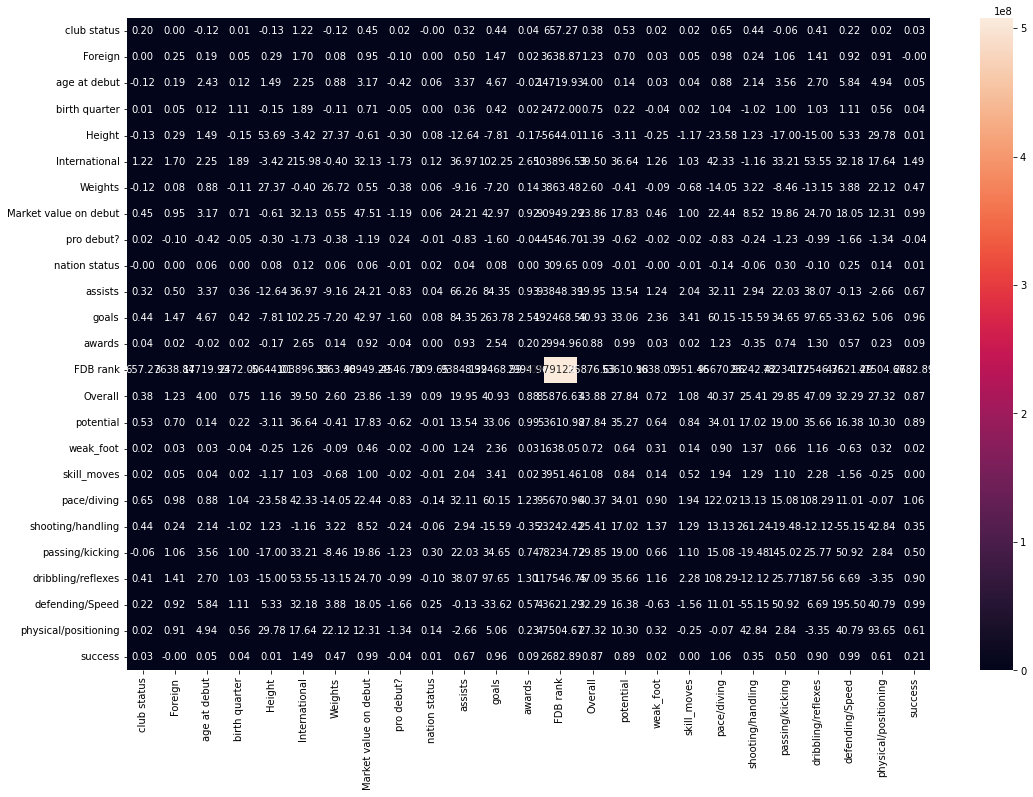

In [10]:
fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.cov(), annot=True, fmt=".2f");

In [11]:
success_cov = df.cov().iloc[-1][:-1].sort_values(ascending=False)
success_cov

FDB rank                 2682.894911
International               1.485037
pace/diving                 1.064903
Market value on debut       0.987268
defending/Speed             0.986592
goals                       0.959408
dribbling/reflexes          0.900376
potential                   0.892438
Overall                     0.867500
assists                     0.669054
physical/positioning        0.612966
passing/kicking             0.501630
Weights                     0.469186
shooting/handling           0.351424
awards                      0.089629
age at debut                0.046152
birth quarter               0.038916
club status                 0.030412
weak_foot                   0.015625
Height                      0.011594
nation status               0.005987
skill_moves                 0.002026
Foreign                    -0.000496
pro debut?                 -0.038494
Name: success, dtype: float64

In [12]:
list(success_cov[success_cov > 0.5].index)

['FDB rank',
 'International',
 'pace/diving',
 'Market value on debut',
 'defending/Speed',
 'goals',
 'dribbling/reflexes',
 'potential',
 'Overall',
 'assists',
 'physical/positioning',
 'passing/kicking']

## Correlation
In statistics, correlation measures how closely two or more random variables move together. When the movement of one variable reciprocates in some way or another with that of another variable, then the variables are said to be correlated.


The relationship between Covarians and Correlation

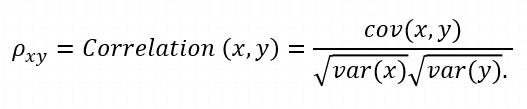

Correlation, however, is preferred over covariance when measuring the relationship between variables because it is not affected by scale changes. 

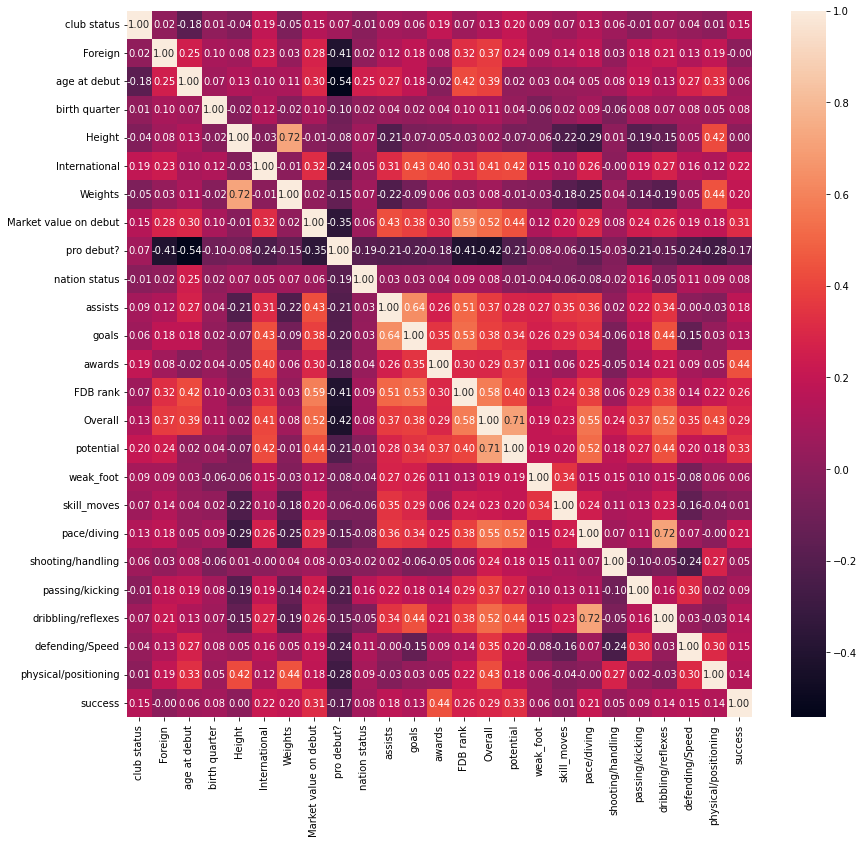

In [13]:
fig, ax = plt.subplots(figsize=(14,13))
sns.heatmap(df.corr(), annot=True, fmt=".2f");

In [14]:
success_corr = df.corr().iloc[-1][:-1].sort_values(ascending=False)
success_corr

awards                   0.435956
potential                0.328657
Market value on debut    0.313250
Overall                  0.286408
FDB rank                 0.260392
International            0.221002
pace/diving              0.210842
Weights                  0.198520
assists                  0.179757
defending/Speed          0.154321
club status              0.150439
dribbling/reflexes       0.143786
physical/positioning     0.138533
goals                    0.129196
passing/kicking          0.091105
nation status            0.083628
birth quarter            0.080847
age at debut             0.064743
weak_foot                0.061055
shooting/handling        0.047553
skill_moves              0.006164
Height                   0.003461
Foreign                 -0.002175
pro debut?              -0.170565
Name: success, dtype: float64

In [15]:
list(success_corr[success_corr > 0.2].index)

['awards',
 'potential',
 'Market value on debut',
 'Overall',
 'FDB rank',
 'International',
 'pace/diving']

## Which variables are most important for each position?

Using correlation to find out the impace of each variable on 'Success'

In [16]:
positions = df['Position'].unique()
positions

array(['Winger', 'STR', 'FB', 'CAM', 'CB', 'CM', 'CDM', 'GK'],
      dtype=object)

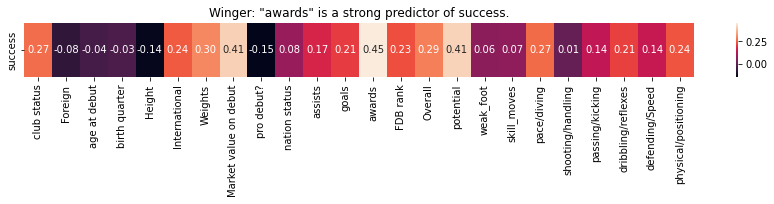

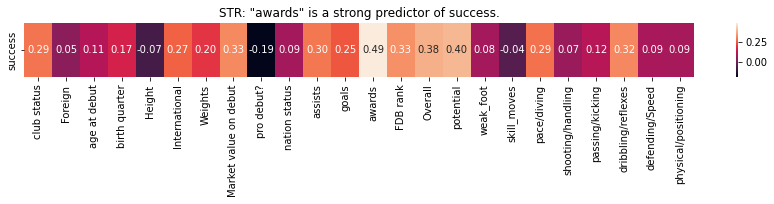

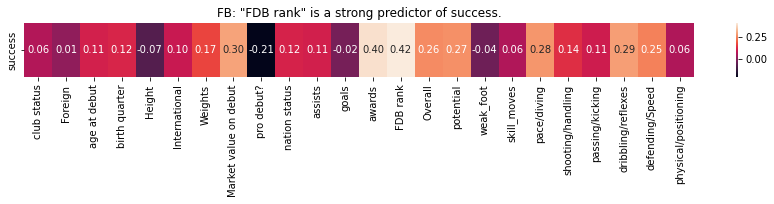

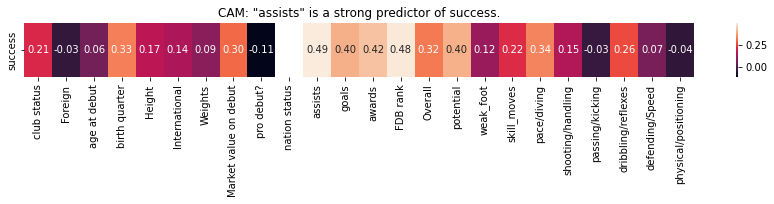

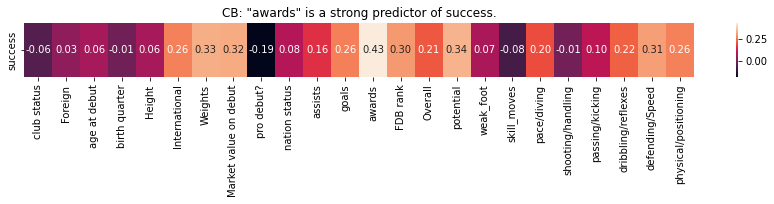

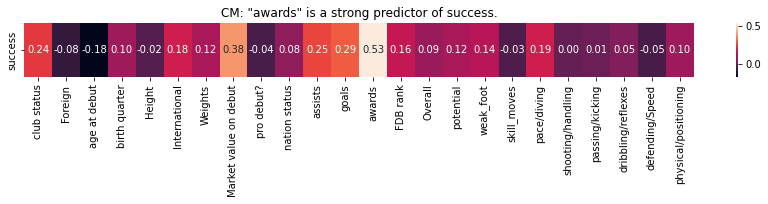

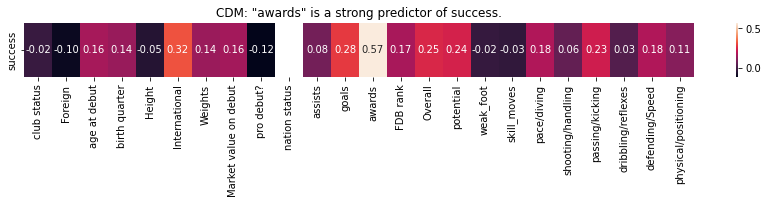

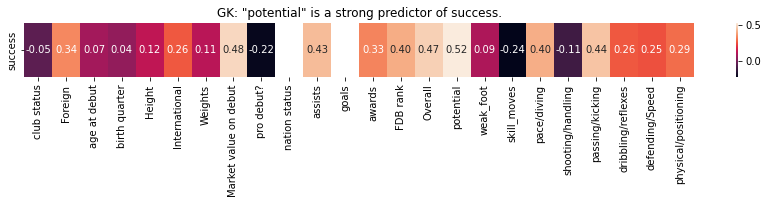

In [17]:
for pos in positions:
    fig, ax = plt.subplots(figsize=(15,1))
    df1 = df[df['Position']==pos].corr().drop('success', axis = 1)[24:25]
    sns.heatmap(df1, annot=True, fmt=".2f"); 
    ax.set_title(pos + ': "' + df1.idxmax(axis=1).values[0] +  '" is a strong predictor of success.')
    



# Models:
## Train and test data creation and normalisation

In [18]:
## Success prediction

y = df['success']
X = df.drop(['name','Position','success'], axis=1) # 'club status', 'Foreign', 'age at debut', 'birth quarter', 'Height', 'Weights', 'pro debut?', 'nation status', 'awards'], axis=1

# Create train and test data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) 

## Min-max normalisation
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)


### PCA function 

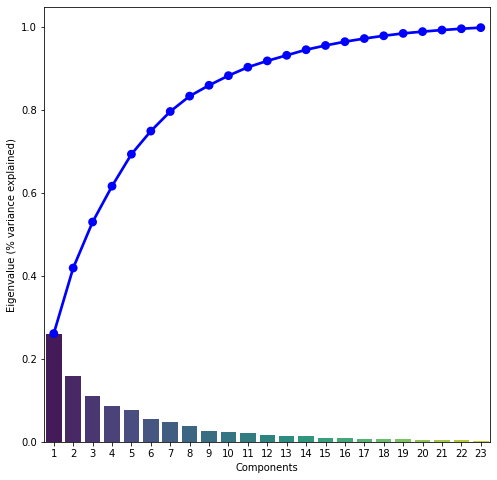

In [19]:
number_of_components = 23

pca = PCA(n_components = number_of_components).fit(MinMaxScaler().fit_transform(X))
components = pca.transform(X)
variance_per_component = pca.explained_variance_ratio_

# Sum the eigenvalues to get the cumulative variance explained for each component
cumulative_variance = np.cumsum(variance_per_component)
x_range = list(range(1, number_of_components+1))
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.barplot(x=x_range, y=variance_per_component, palette="viridis", ax=ax)

# show the cumulative variance with a blue line
sns.pointplot(x=x_range, y=cumulative_variance, ax=ax, color="blue", label="Cumulative variance")

plt.xlabel("Components");
plt.ylabel("Eigenvalue (% variance explained)");


As PCA applies orthogonal transformation to generate new features along the directions that maximize the variation in the data, it does not reveal the importance of the original features.

In [20]:
def show_results(prediction, y_test,target_names):
    target_names = ['Not successful', 'Successful']
    print('\n',classification_report(prediction, y_test, target_names = target_names))
    ax = plt.subplot()
    cm = confusion_matrix(prediction, y_test)
    sns.heatmap(cm, annot=True, ax=ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted status');
    ax.set_ylabel('True status');
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['Not successful', 'Successful']);
    ax.yaxis.set_ticklabels(['Not successful', 'Successful']);

In [21]:
target_names = ['Not sucessful', 'Sucessful']

## Random Forest

Best parameters are:  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200}

                 precision    recall  f1-score   support

Not successful       0.90      0.76      0.82       103
    Successful       0.49      0.73      0.59        33

      accuracy                           0.75       136
     macro avg       0.69      0.74      0.70       136
  weighted avg       0.80      0.75      0.76       136



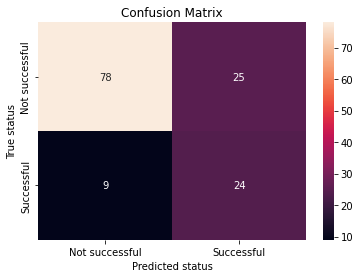

In [22]:

RF = RandomForestClassifier(random_state = 42)

param_grid = { 
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_RF = GridSearchCV(estimator = RF, param_grid = param_grid, cv = 5)
CV_RF.fit(X_train_norm, y_train)

print('Best parameters are: ', CV_RF.best_params_)

RF_prediction = CV_RF.predict(X_test_norm)

#print('\n',classification_report(RF_prediction, y_test, target_names = target_names))

show_results(RF_prediction, y_test,target_names)


## Random Forest and PCA


                 precision    recall  f1-score   support

Not successful       0.91      0.75      0.82       105
    Successful       0.47      0.74      0.58        31

      accuracy                           0.75       136
     macro avg       0.69      0.75      0.70       136
  weighted avg       0.81      0.75      0.77       136



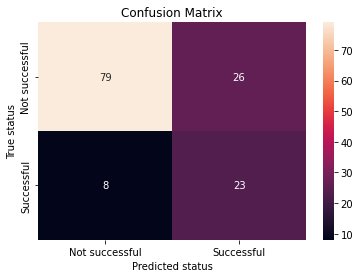

In [23]:
pca = PCA(n_components = 14)

RF = RandomForestClassifier(max_depth = CV_RF.best_params_['max_depth'],
                            max_features = CV_RF.best_params_['max_features'],
                            n_estimators = CV_RF.best_params_['n_estimators'],
                            criterion = CV_RF.best_params_['criterion'],
                            random_state = 42)

pca_RF_pipe = Pipeline([('pca', pca), ('Classifer', RF)])
pca_RF_pipe.fit(X_train_norm, y_train)
pca_RF_prediction = pca_RF_pipe.predict(X_test_norm)
show_results(pca_RF_prediction, y_test,target_names)


### Random Forest and Correlation 

In [24]:
list(success_corr[success_corr > 0.2].index)

['awards',
 'potential',
 'Market value on debut',
 'Overall',
 'FDB rank',
 'International',
 'pace/diving']

In [25]:
y1 = df['success']
X1 = df[success_corr[success_corr > 0.2].index]
# Create train and test data sets

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state=42) 

## Min-max normalisation
norm = MinMaxScaler()
X_train_norm1 = norm.fit_transform(X_train1)
X_test_norm1 = norm.transform(X_test1)


                 precision    recall  f1-score   support

Not successful       0.89      0.75      0.81       102
    Successful       0.49      0.71      0.58        34

      accuracy                           0.74       136
     macro avg       0.69      0.73      0.70       136
  weighted avg       0.79      0.74      0.76       136



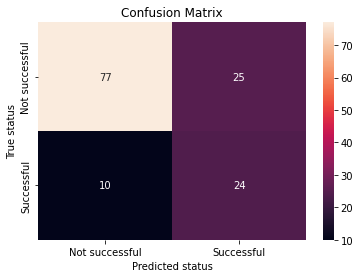

In [26]:
RF1 = RandomForestClassifier(max_depth = CV_RF.best_params_['max_depth'],
                            max_features = CV_RF.best_params_['max_features'],
                            n_estimators = CV_RF.best_params_['n_estimators'],
                            criterion = CV_RF.best_params_['criterion'],
                            random_state = 42)

RF1.fit(X_train_norm1, y_train1)
RF_prediction1 = RF1.predict(X_test_norm1)
show_results(RF_prediction1, y_test1,target_names)

## KNN

Best parameters are:  {'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}

                 precision    recall  f1-score   support

Not successful       0.92      0.74      0.82       108
    Successful       0.43      0.75      0.55        28

      accuracy                           0.74       136
     macro avg       0.67      0.75      0.68       136
  weighted avg       0.82      0.74      0.76       136



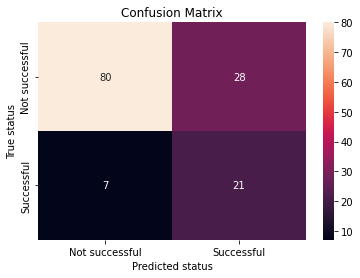

In [27]:

KNN = KNeighborsClassifier()

param_grid = { 'n_neighbors' : [5,7,9,11,13,15],  
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

CV_KNN = GridSearchCV(estimator = KNN, param_grid = param_grid, cv = 5)
CV_KNN.fit(X_train_norm, y_train)
print('Best parameters are: ', CV_KNN.best_params_)

KNN_prediction = CV_KNN.predict(X_test_norm)
show_results(KNN_prediction, y_test, target_names)

## KNN and PCA


                 precision    recall  f1-score   support

Not successful       0.92      0.74      0.82       108
    Successful       0.43      0.75      0.55        28

      accuracy                           0.74       136
     macro avg       0.67      0.75      0.68       136
  weighted avg       0.82      0.74      0.76       136



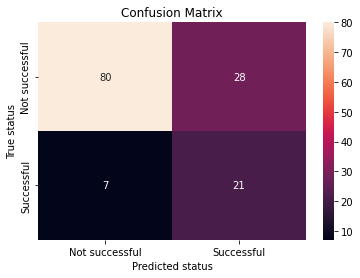

In [28]:
pca = PCA(n_components = 14)

KNN = KNeighborsClassifier(n_neighbors = CV_KNN.best_params_['n_neighbors'],
                            weights = CV_KNN.best_params_['weights'],
                            metric = CV_KNN.best_params_['metric'])

pca_KNN_pipe = Pipeline([('pca', pca), ('Classifer', KNN)])
pca_KNN_pipe.fit(X_train_norm, y_train)
pca_KNN_prediction = pca_KNN_pipe.predict(X_test_norm)
show_results(pca_KNN_prediction, y_test,target_names)


## SVM

Best parameters are:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

                 precision    recall  f1-score   support

Not successful       0.84      0.80      0.82        91
    Successful       0.63      0.69      0.66        45

      accuracy                           0.76       136
     macro avg       0.74      0.75      0.74       136
  weighted avg       0.77      0.76      0.77       136



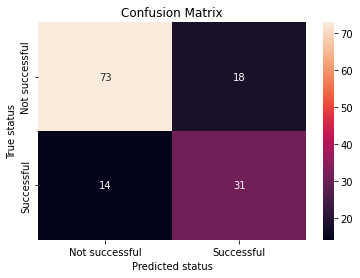

In [29]:
SVM = SVC()
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

CV_SVM = GridSearchCV(estimator = SVM, param_grid = param_grid, cv = 5)
CV_SVM.fit(X_train_norm, y_train)
print('Best parameters are: ', CV_SVM.best_params_)

SVM_prediction = CV_SVM.predict(X_test_norm)
show_results(SVM_prediction, y_test, target_names)


## SVM and PCA


                 precision    recall  f1-score   support

Not successful       0.79      0.80      0.80        86
    Successful       0.65      0.64      0.65        50

      accuracy                           0.74       136
     macro avg       0.72      0.72      0.72       136
  weighted avg       0.74      0.74      0.74       136



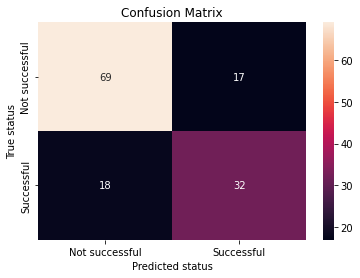

In [30]:
pca = PCA(n_components = 14)

SVM = SVC( C = CV_SVM.best_params_['C'],
                            gamma = CV_SVM.best_params_['gamma'],
                            kernel = CV_SVM.best_params_['kernel'])

pca_SVM_pipe = Pipeline([('pca', pca), ('Classifer', SVM)])
pca_SVM_pipe.fit(X_train_norm, y_train)
pca_SVM_prediction = pca_SVM_pipe.predict(X_test_norm)
show_results(pca_SVM_prediction, y_test,target_names)

## Neural Network


### Number of Hidden Layers

In [31]:

def create_model(hidden_layers):
    # create model
    model = Sequential()
    # Adding the input layer and the first hidden layer
    model.add(Dense(32, activation = 'relu', input_dim =24))

    # Adding the more hidden layer
    for i in range(hidden_layers):
        model.add(Dense(units = 8, activation = 'relu'))

    # Adding the output layer
    model.add(Dense(units = 1, activation ='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)


# create model
model = KerasRegressor(build_fn = create_model, epochs = 20, batch_size = 2, verbose=0)

# define the grid search parameters
hidden_layers = [1, 2, 3, 4]
param_grid = dict(hidden_layers = hidden_layers)
grid = GridSearchCV(estimator = model, param_grid = 
                    param_grid, n_jobs=1, scoring ='neg_mean_squared_error', cv = 5)
grid_result = grid.fit(X_train_norm, y_train)    


In [32]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.155297 using {'hidden_layers': 1}



                 precision    recall  f1-score   support

Not successful       0.86      0.79      0.82        95
    Successful       0.59      0.71      0.64        41

      accuracy                           0.76       136
     macro avg       0.73      0.75      0.73       136
  weighted avg       0.78      0.76      0.77       136



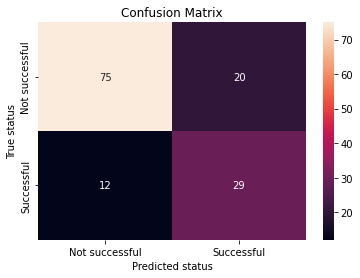

In [33]:
show_results(np.round(grid_result.predict(X_test_norm)), y_test,target_names)

## Number of nodes in the hidden layers


In [34]:
def create_model(layer1, layer2):
    # create model
    model = Sequential()
    # Adding the input layer and the first hidden layer
    model.add(Dense(layer1, activation = 'relu', input_dim = 24))

    # Adding the two hidden layer
    model.add(Dense(units = layer2, activation = 'relu'))
    
    # Adding the output layer
    model.add(Dense(units = 1, activation = 'sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)


# create model
model = KerasRegressor(build_fn=create_model, epochs = 20, batch_size = 2, verbose=0)

# define the grid search parameters

param_grid = {'layer1':[64,32], 'layer2':[32, 16, 8]}
grid1 = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs=1, scoring='neg_mean_squared_error', cv = 5)
grid_result1 = grid1.fit(X_train_norm, y_train)


    

In [35]:
# summarize results
print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))

Best: -0.152640 using {'layer1': 32, 'layer2': 8}



                 precision    recall  f1-score   support

Not successful       0.85      0.80      0.82        93
    Successful       0.61      0.70      0.65        43

      accuracy                           0.76       136
     macro avg       0.73      0.75      0.74       136
  weighted avg       0.78      0.76      0.77       136



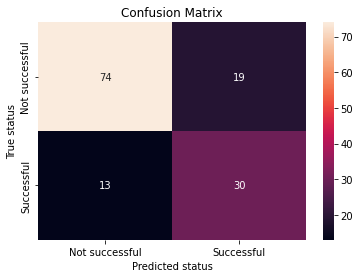

In [36]:
show_results(np.round(grid_result1.predict(X_test_norm)), y_test,target_names)